In [1]:
import pandas as pd
from datetime import datetime
import os

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", 900)

In [3]:
msg_total=pd.read_csv('../safety_msg_crawling_total.csv',engine='python')

In [4]:
msg_total

,create_date,location_id,location_name,md101_sn,msg,send_platform
0,2021-07-02 10:24:18,104,대구광역시 전체,110649,[대구광역시] 2일 0시 기준 확진자 9명(동구3 북구2 서구1 수성구1 달서구1 달성군1)발생. 의심시 외출 자제 및 가까운 보건소 예약 후 검사 바랍니다.,cbs
1,2021-07-02 10:22:59,98,광주광역시 전체,110648,"[광주광역시] 6.18.(금)~6.30.(수) 보보스(BOBOS)호프(북구 대자로 72-1, 운암동)에 방문하신 분은 거주지 보건소에서 검사받으시기 바랍니다.",cbs
2,2021-07-02 10:16:02,23,경기도 고양시,110647,"[고양시청]7.1.(목) 일일 확진자 33명(덕양구9,일산동구14,일산서구9,타지역 거주1) ▶타지역확진 고양시민 2명 https://han.gl/iMmgw 참조",cbs
3,2021-07-02 10:11:29,58,경상남도 남해군,110646,[남해군청]▶7.2.(금) 09:00기준 확진자 2명 발생 ( 자가격리 중 해제 전 검사 시 ) ▶관련정보는 남해군 홈페이지 또는 페이스북 참고 바랍니다.,cbs
4,2021-07-02 10:09:23,26,경기도 광주시,110645,"[광주시청]제2차 광주시 재난기본소득(1인당 10만원) 미신청 하신 분은 7월말까지 주소지 읍면동사무소에서 신청바랍니다.(대상: 3.8.기준 광주시민,등록외국인)",cbs
...,...,...,...,...,...,...
90143,2011-11-20 12:10:41,"3,4,5,6,7,9","강원도 강릉시,강원도 고성군,강원도 동해시,강원도 삼척시,강원도 속초시,강원도 양양군",10,"[국민안전처]20일 12시 동해중부먼바다 풍랑경보, 어선은 출항을 금지하고 출어선은 신속히 대피하기 바랍니다.",cbs
90144,2011-11-18 21:12:20,200,전라남도 해남군,9,"[국민안전처]\n18일21시10분 전남 해남지역 호우경보, 상습침수및위험지역 대피,외출자제 등 안전에 주의하세요",cbs
90145,2011-11-18 11:38:36,217,제주특별자치도 전체,8,"[국민안전처]\n18일11시30분 제주동부지역 호우경보, 상습침수및위험지역 대피,외출자제 등 안전에 주의하세요",cbs
90146,2011-11-18 08:20:05,217,제주특별자치도 전체,7,"[국민안전처]\n18일8시20분 제주산간,북부지역 호우경보, 상습침수및위험지역 대피,외출자제 등 안전에 주의하세요",cbs


In [5]:
msg_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90148 entries, 0 to 90147
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   create_date    90148 non-null  object
 1   location_id    90148 non-null  object
 2   location_name  90101 non-null  object
 3   md101_sn       90148 non-null  int64 
 4   msg            90147 non-null  object
 5   send_platform  90148 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.1+ MB


In [6]:
msg_total.isnull().sum()

create_date       0
location_id       0
location_name    47
md101_sn          0
msg               1
send_platform     0
dtype: int64

In [7]:
msg_total['create_date']=pd.to_datetime(msg_total['create_date'])

In [8]:
msg_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90148 entries, 0 to 90147
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   create_date    90148 non-null  datetime64[ns]
 1   location_id    90148 non-null  object        
 2   location_name  90101 non-null  object        
 3   md101_sn       90148 non-null  int64         
 4   msg            90147 non-null  object        
 5   send_platform  90148 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.1+ MB


In [9]:
msg_total=msg_total[msg_total['create_date']>='2020-01-23 15:08:34']
msg_total

,create_date,location_id,location_name,md101_sn,msg,send_platform
0,2021-07-02 10:24:18,104,대구광역시 전체,110649,[대구광역시] 2일 0시 기준 확진자 9명(동구3 북구2 서구1 수성구1 달서구1 달성군1)발생. 의심시 외출 자제 및 가까운 보건소 예약 후 검사 바랍니다.,cbs
1,2021-07-02 10:22:59,98,광주광역시 전체,110648,"[광주광역시] 6.18.(금)~6.30.(수) 보보스(BOBOS)호프(북구 대자로 72-1, 운암동)에 방문하신 분은 거주지 보건소에서 검사받으시기 바랍니다.",cbs
2,2021-07-02 10:16:02,23,경기도 고양시,110647,"[고양시청]7.1.(목) 일일 확진자 33명(덕양구9,일산동구14,일산서구9,타지역 거주1) ▶타지역확진 고양시민 2명 https://han.gl/iMmgw 참조",cbs
3,2021-07-02 10:11:29,58,경상남도 남해군,110646,[남해군청]▶7.2.(금) 09:00기준 확진자 2명 발생 ( 자가격리 중 해제 전 검사 시 ) ▶관련정보는 남해군 홈페이지 또는 페이스북 참고 바랍니다.,cbs
4,2021-07-02 10:09:23,26,경기도 광주시,110645,"[광주시청]제2차 광주시 재난기본소득(1인당 10만원) 미신청 하신 분은 7월말까지 주소지 읍면동사무소에서 신청바랍니다.(대상: 3.8.기준 광주시민,등록외국인)",cbs
...,...,...,...,...,...,...
85635,2020-01-24 11:00:13,179,전라남도 전체,25017,"[전남도청]신종 코로나바이러스감염증 예방을 위해 손씻기, 마스크착용 등 수칙 준수, 중국 우한시 방문후 발열, 호흡기증상 발생시 1339 또는 보건소 상담바랍니다",cbs
85636,2020-01-24 11:00:05,104,대구광역시 전체,25016,"[대구광역시청]신종 코로나바이러스감염증 예방을 위해 손씻기, 기침예절, 마스크착용 등 수칙 준수와 발열 호흡기증상 발생시 1339 또는 보건소로 상담 바랍니다.",cbs
85637,2020-01-23 18:11:01,42,경기도 연천군,25015,"[연천군청]설 명절 아프리카 돼지열병 확산방지를 위하여, 방역울타리 출입을 자제해 주시고, 울타리 출입 시 반드시 문단속을 하여 주시기 바랍니다.",cbs
85638,2020-01-23 17:00:37,"2,21,53,98,104,113,119,136,162,168,179,202,217,222,238,6474","강원도 전체,경기도 전체,경상남도 전체,광주광역시 전체,대구광역시 전체,대전광역시 전체,부산광역시 전체,서울특별시 전체,울산광역시 전체,인천광역시 전체,전라남도 전체,전라북도 전체,제주특별자치도 전체,충청남도 전체,충청북도 전체,세종특별자치시",25014,"[행정안전부] 신종 코로나바이러스감염증 예방을 위해 손씻기, 기침예절, 마스크착용 등 수칙 준수와 발열 호흡기 증상 발생 시 1339 또는 보건소로 상담바랍니다.",cbs


### 검사독려 문자

In [10]:
plz_be_tested = msg_total[msg_total["msg"].str.contains("선별진료소") |\
                          msg_total["msg"].str.contains("무기명") |\
                          msg_total["msg"].str.contains("증상") |\
                          msg_total["msg"].str.contains("발현") |\
                          msg_total["msg"].str.contains("의심") |\
                          msg_total["msg"].str.contains("가까운") |\
                          msg_total["msg"].str.contains("발열") |\
                          msg_total["msg"].str.contains("오한") |\
                          msg_total["msg"].str.contains("기침") |\
                          msg_total["msg"].str.contains("두통") |\
                          msg_total["msg"].str.contains("구토") |\
                          msg_total["msg"].str.contains("설사") |\
                          msg_total["msg"].str.contains("1339")
                         ]

In [11]:
plz_be_tested=plz_be_tested.drop(['location_id','location_name','md101_sn','msg','send_platform'],axis=1)

In [12]:
plz_be_tested=plz_be_tested.reset_index(drop=True)

In [13]:
plz_be_tested

,create_date
0,2021-07-02 10:24:18
1,2021-07-02 10:00:07
2,2021-07-02 09:08:28
3,2021-07-02 08:13:54
4,2021-07-01 18:11:24
...,...
13999,2020-01-24 11:37:52
14000,2020-01-24 11:00:13
14001,2020-01-24 11:00:05
14002,2020-01-23 17:00:37


In [14]:
plz_be_tested.columns

Index(['create_date'], dtype='object')

In [15]:
msg_sent=plz_be_tested.groupby(plz_be_tested['create_date'].dt.date).count()
msg_sent.columns=['amount']
msg_sent.reset_index(inplace=True)
msg_sent['create_date']=pd.to_datetime(msg_sent['create_date'])
msg_sent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   create_date  526 non-null    datetime64[ns]
 1   amount       526 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.3 KB


In [16]:
msg_sent

,create_date,amount
0,2020-01-23,2
1,2020-01-24,14
2,2020-01-25,4
3,2020-01-26,3
4,2020-01-27,9
5,2020-01-28,10
6,2020-01-29,13
7,2020-01-30,26
8,2020-01-31,30
9,2020-02-01,17


In [17]:
msg_sent_smoothed=msg_sent.rolling(7,min_periods=1).mean()
msg_sent_smoothed.index=msg_sent['create_date']
msg_sent_smoothed

,amount
create_date,
2020-01-23,2.000000
2020-01-24,8.000000
2020-01-25,6.666667
2020-01-26,5.750000
2020-01-27,6.400000
2020-01-28,7.000000
2020-01-29,7.857143
2020-01-30,11.285714
2020-01-31,13.571429


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks_cwt

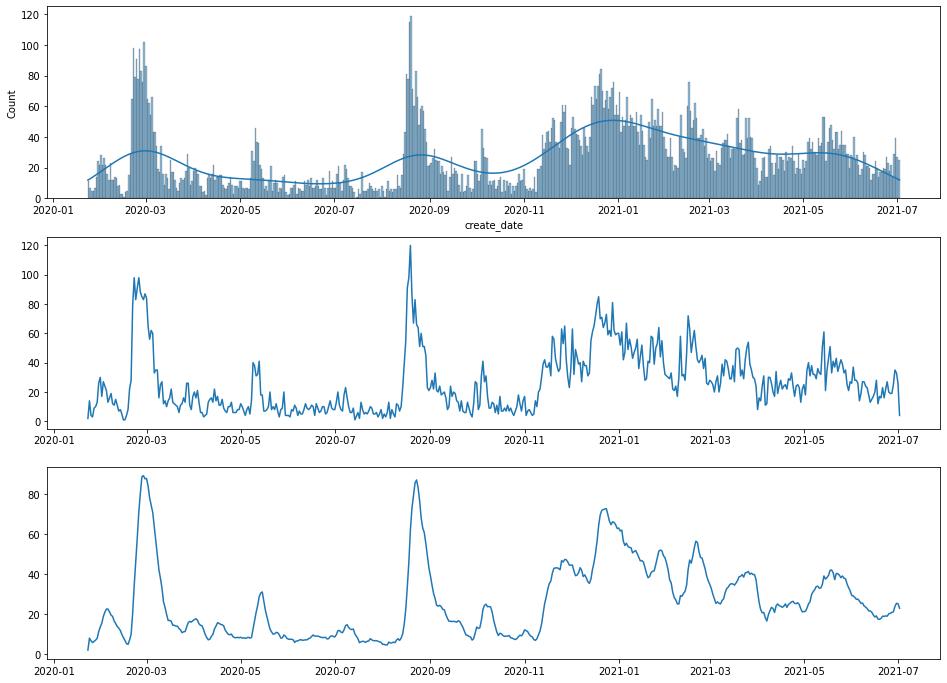

In [19]:
fig,axs=plt.subplots(ncols=1,nrows=3,figsize=(16,12))
plt.subplot(3,1,1)
sns.histplot(data=plz_be_tested,x='create_date',bins=526,kde=True)
axs[1].plot(msg_sent.create_date,msg_sent.amount)
axs[2].plot(msg_sent_smoothed.index, msg_sent_smoothed.amount)

In [20]:
import numpy as np

In [21]:
peaks=find_peaks_cwt(msg_sent_smoothed['amount'].to_numpy(),
                     widths=np.ones(msg_sent_smoothed['amount'].to_numpy().shape)*2)
msg_sent_smoothed.iloc[peaks]

,amount
create_date,
2020-02-05,22.571429
2020-02-27,88.857143
2020-04-17,15.428571
2020-05-15,31.142857
2020-06-18,9.000000
2020-07-10,13.285714
2020-08-22,85.714286
2020-10-08,23.714286
2020-11-28,47.285714


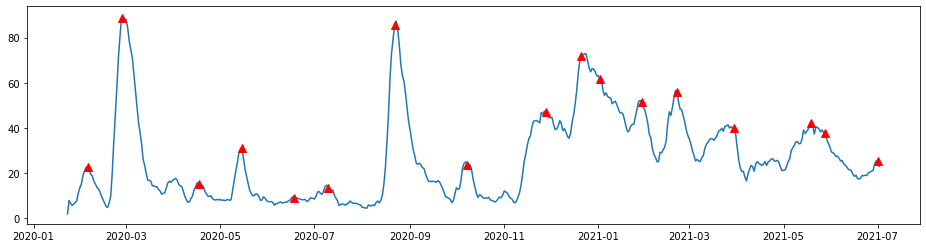

In [22]:
plt.figure(figsize=(16,4))
plt.plot(msg_sent_smoothed)
plt.plot(msg_sent_smoothed.iloc[peaks],'r^',ms=8)

### covid19_api_일일검진자수

In [23]:
covid_df = pd.read_csv("../covid19_api_preprocessed.csv",engine='python')
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   누적확진률    492 non-null    float64
 1   누적검사수    523 non-null    int64  
 2   누적검사완료수  523 non-null    int64  
 3   치료중환자수   523 non-null    int64  
 4   격리해제수    523 non-null    int64  
 5   등록시간     523 non-null    object 
 6   누적사망자수   523 non-null    int64  
 7   누적확진자수   523 non-null    int64  
 8   검사진행수    523 non-null    int64  
 9   검사음성수    523 non-null    int64  
 10  게시글번호    523 non-null    int64  
 11  기준일      523 non-null    object 
 12  기준시간     523 non-null    object 
 13  수정시간     459 non-null    object 
 14  일일확진자수   522 non-null    float64
 15  일일사망자수   522 non-null    float64
 16  일일검사수    522 non-null    float64
dtypes: float64(4), int64(9), object(4)
memory usage: 69.6+ KB


In [24]:
covid_df['기준일']=pd.to_datetime(covid_df['기준일'])

In [25]:
covid_df

,누적확진률,누적검사수,누적검사완료수,치료중환자수,격리해제수,등록시간,누적사망자수,누적확진자수,검사진행수,검사음성수,게시글번호,기준일,기준시간,수정시간,일일확진자수,일일사망자수,일일검사수
0,NaN,0,0,0,1,2020-01-31 17:47:33.330,0,0,1,0,1,2020-01-01,18:00,2020-02-03 12:21:56.560,NaN,NaN,NaN
1,NaN,0,0,0,1,2020-01-31 17:47:33.330,0,0,1,0,1,2020-02-01,18:00,2020-01-31 17:47:33.330,0.0,0.0,0.0
2,NaN,0,0,0,2,2020-02-03 12:22:49.490,2,2,2,0,2,2020-02-02,09:00,2020-02-03 12:22:49.490,2.0,2.0,0.0
3,NaN,0,0,0,0,2020-02-03 14:41:17.170,0,15,0,0,3,2020-02-03,09:00,2020-02-03 14:41:17.170,13.0,-2.0,0.0
4,NaN,0,0,0,0,2020-02-03 21:26:59.590,0,0,0,0,4,2020-02-04,00:00,2020-02-03 21:26:59.590,-15.0,0.0,0.0
5,NaN,0,0,0,1,2020-02-05 20:05:40.400,0,19,40,0,6,2020-02-05,19:00,2020-02-05 20:05:40.400,19.0,0.0,0.0
6,NaN,0,0,0,1,2020-02-06 09:09:49.490,0,23,169,0,7,2020-02-06,09:00,2020-02-06 09:09:49.490,4.0,0.0,0.0
7,NaN,0,0,0,2,2020-02-07 17:20:45.450,0,24,327,0,9,2020-02-07,16:00,2020-02-07 17:20:45.450,1.0,0.0,0.0
8,NaN,0,0,0,2,2020-02-08 17:01:34.340,0,24,939,0,14,2020-02-08,16:00,2020-02-08 17:01:34.340,0.0,0.0,0.0
9,NaN,0,0,0,3,2020-02-09 16:59:21.210,0,27,888,0,16,2020-02-09,16:00,2020-02-09 16:59:21.210,3.0,0.0,0.0


In [26]:
covid_df.columns

Index(['누적확진률', '누적검사수', '누적검사완료수', '치료중환자수', '격리해제수', '등록시간', '누적사망자수',
       '누적확진자수', '검사진행수', '검사음성수', '게시글번호', '기준일', '기준시간', '수정시간', '일일확진자수',
       '일일사망자수', '일일검사수'],
      dtype='object')

In [27]:
covid_df['일일검사수']=covid_df['일일검사수'].fillna(0)

In [28]:
covid_df=covid_df[['기준일', '일일검사수']]

In [29]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일     523 non-null    datetime64[ns]
 1   일일검사수   523 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.3 KB


In [30]:
covid_df=covid_df.reset_index(drop=True)
covid_df.index=covid_df['기준일']
covid_df

,기준일,일일검사수
기준일,,
2020-01-01,2020-01-01,0.0
2020-02-01,2020-02-01,0.0
2020-02-02,2020-02-02,0.0
2020-02-03,2020-02-03,0.0
2020-02-04,2020-02-04,0.0
2020-02-05,2020-02-05,0.0
2020-02-06,2020-02-06,0.0
2020-02-07,2020-02-07,0.0
2020-02-08,2020-02-08,0.0


### 평활화

In [31]:
covid_df_smoothed=covid_df.rolling(7,min_periods=1).mean()
covid_df_smoothed.index=covid_df['기준일']
covid_df_smoothed

,일일검사수
기준일,
2020-01-01,0.000000
2020-02-01,0.000000
2020-02-02,0.000000
2020-02-03,0.000000
2020-02-04,0.000000
2020-02-05,0.000000
2020-02-06,0.000000
2020-02-07,0.000000
2020-02-08,0.000000


In [32]:
from scipy.signal import find_peaks_cwt
import numpy as np

In [33]:
peaks1 = find_peaks_cwt(covid_df_smoothed["일일검사수"].to_numpy(),
                       widths=np.ones(covid_df_smoothed["일일검사수"].to_numpy().shape)*2)
covid_df_smoothed.iloc[peaks1]

,일일검사수
기준일,
2020-03-07,25455.571429
2020-04-07,9534.285714
2020-05-17,11966.714286
2020-06-04,15027.428571
2020-07-13,10930.857143
2020-08-26,19206.000000
2020-09-05,18245.142857
2020-11-01,12069.142857
2020-11-22,17421.571429


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

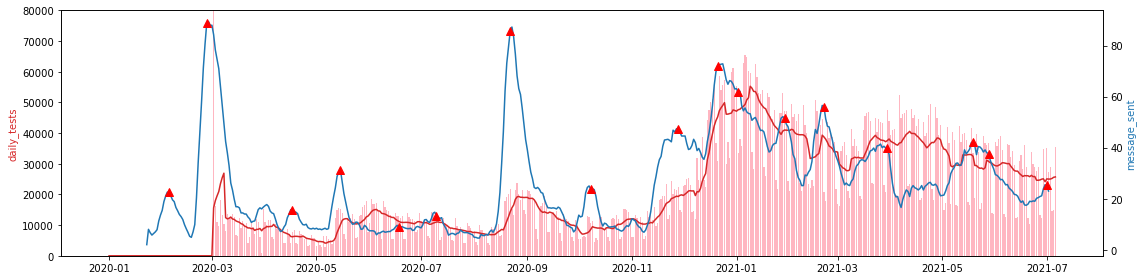

In [36]:
fig,ax1=plt.subplots(figsize=(16,4))
color='tab:red'
ax1.set_ylabel('daily_tests',color=color)
ax1.plot(covid_df_smoothed,color=color)
ax1.bar(covid_df.index, covid_df['일일검사수'],color='lightpink')
ax1.set_ylim(0,80000)

ax2=ax1.twinx()
color='tab:blue'
ax2.set_ylabel('message_sent',color=color)
ax2.plot(msg_sent_smoothed,color=color)
ax2.plot(msg_sent_smoothed.iloc[peaks],'r^',ms=8)
fig.tight_layout()